# depression, ed, healthanxiety, lonely, mentalhealth, parenting

In [1]:
!pip install scipy
!pip install pandas
!pip install numpy
!pip install prettytable

In [39]:
from scipy.stats import f_oneway, ttest_ind
import itertools
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from numpy import mean, std
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import ipywidgets as widgets

In [3]:
adhd_data = pd.read_csv('datasets/adhd_2018_features_tfidf_256.csv')
anxiety_data = pd.read_csv('datasets/anxiety_2018_features_tfidf_256.csv')
autism_data = pd.read_csv('datasets/autism_2018_features_tfidf_256.csv')
bpd_data = pd.read_csv('datasets/bpd_2018_features_tfidf_256.csv')
depression_data = pd.read_csv('datasets/depression_2018_features_tfidf_256.csv')
ed_data = pd.read_csv('datasets/EDAnonymous_2019_features_tfidf_256.csv')
healthanxiety_data = pd.read_csv('datasets/healthanxiety_2018_features_tfidf_256.csv')
ptsd_data = pd.read_csv('datasets/ptsd_2018_features_tfidf_256.csv')
schizophrenia_data = pd.read_csv('datasets/schizophrenia_2018_features_tfidf_256.csv')
socialanxiety_data = pd.read_csv('datasets/socialanxiety_2018_features_tfidf_256.csv')

datasets = {
    "adhd": adhd_data,
    "anxiety": anxiety_data,
    "autism": autism_data,
    "bpd": bpd_data,
    "depression": depression_data,
    "ed": ed_data,
    "healthanxiety": healthanxiety_data,
    "ptsd": ptsd_data,
    "schizophrenia": schizophrenia_data,
    "socialanxiety": socialanxiety_data
}

readability_parameters = [
    "automated_readability_index",
    "coleman_liau_index",
    "flesch_kincaid_grade_level",
    "flesch_reading_ease",
    "gulpease_index",
    "gunning_fog_index",
    "lix",
    "smog_index",
    "wiener_sachtextformel"
]

tfidf_parameters = [
    "tfidf_abus",
    "tfidf_actual",
    "tfidf_addict",
    "tfidf_adhd",
    "tfidf_advic",
    "tfidf_ago",
    "tfidf_alcohol",
    "tfidf_almost",
    "tfidf_alon",
    "tfidf_alreadi",
    "tfidf_also",
    "tfidf_alway",
    "tfidf_amp",
    "tfidf_amp x200b",
    "tfidf_ani",
    "tfidf_anoth",
    "tfidf_anxieti",
    "tfidf_anxious",
    "tfidf_anymor",
    "tfidf_anyon",
    "tfidf_anyon els",
    "tfidf_anyth",
    "tfidf_around",
    "tfidf_ask",
    "tfidf_attack",
    "tfidf_away",
    "tfidf_back",
    "tfidf_bad",
    "tfidf_becaus",
    "tfidf_becom",
    "tfidf_befor",
    "tfidf_believ",
    "tfidf_best",
    "tfidf_better",
    "tfidf_bit",
    "tfidf_bodi",
    "tfidf_bpd",
    "tfidf_brain",
    "tfidf_call",
    "tfidf_came",
    "tfidf_care",
    "tfidf_caus",
    "tfidf_chang",
    "tfidf_come",
    "tfidf_complet",
    "tfidf_constant",
    "tfidf_control",
    "tfidf_could",
    "tfidf_coupl",
    "tfidf_cri",
    "tfidf_day",
    "tfidf_deal",
    "tfidf_depress",
    "tfidf_diagnos",
    "tfidf_die",
    "tfidf_differ",
    "tfidf_disord",
    "tfidf_doctor",
    "tfidf_doe",
    "tfidf_done",
    "tfidf_dont",
    "tfidf_drink",
    "tfidf_drug",
    "tfidf_eat",
    "tfidf_els",
    "tfidf_emot",
    "tfidf_end",
    "tfidf_enough",
    "tfidf_etc",
    "tfidf_even",
    "tfidf_ever",
    "tfidf_everi",
    "tfidf_everyon",
    "tfidf_everyth",
    "tfidf_experi",
    "tfidf_famili",
    "tfidf_fear",
    "tfidf_feel",
    "tfidf_feel like",
    "tfidf_felt",
    "tfidf_final",
    "tfidf_find",
    "tfidf_first",
    "tfidf_food",
    "tfidf_found",
    "tfidf_friend",
    "tfidf_fuck",
    "tfidf_get",
    "tfidf_give",
    "tfidf_go",
    "tfidf_good",
    "tfidf_got",
    "tfidf_great",
    "tfidf_guess",
    "tfidf_guy",
    "tfidf_happen",
    "tfidf_happi",
    "tfidf_hard",
    "tfidf_hate",
    "tfidf_head",
    "tfidf_health",
    "tfidf_hear",
    "tfidf_heart",
    "tfidf_help",
    "tfidf_high",
    "tfidf_home",
    "tfidf_hope",
    "tfidf_hour",
    "tfidf_hous",
    "tfidf_hurt",
    "tfidf_idea",
    "tfidf_im",
    "tfidf_issu",
    "tfidf_job",
    "tfidf_keep",
    "tfidf_kill",
    "tfidf_kind",
    "tfidf_know",
    "tfidf_last",
    "tfidf_late",
    "tfidf_leav",
    "tfidf_left",
    "tfidf_let",
    "tfidf_life",
    "tfidf_like",
    "tfidf_littl",
    "tfidf_live",
    "tfidf_long",
    "tfidf_look",
    "tfidf_lose",
    "tfidf_lost",
    "tfidf_lot",
    "tfidf_love",
    "tfidf_made",
    "tfidf_make",
    "tfidf_mani",
    "tfidf_mayb",
    "tfidf_mean",
    "tfidf_med",
    "tfidf_medic",
    "tfidf_mental",
    "tfidf_might",
    "tfidf_mind",
    "tfidf_mom",
    "tfidf_month",
    "tfidf_move",
    "tfidf_much",
    "tfidf_need",
    "tfidf_never",
    "tfidf_new",
    "tfidf_next",
    "tfidf_night",
    "tfidf_normal",
    "tfidf_noth",
    "tfidf_notic",
    "tfidf_old",
    "tfidf_onc",
    "tfidf_one",
    "tfidf_onli",
    "tfidf_pain",
    "tfidf_panic",
    "tfidf_parent",
    "tfidf_part",
    "tfidf_past",
    "tfidf_peopl",
    "tfidf_person",
    "tfidf_place",
    "tfidf_pleas",
    "tfidf_point",
    "tfidf_possibl",
    "tfidf_post",
    "tfidf_pretti",
    "tfidf_probabl",
    "tfidf_problem",
    "tfidf_ptsd",
    "tfidf_put",
    "tfidf_question",
    "tfidf_quit",
    "tfidf_read",
    "tfidf_real",
    "tfidf_realli",
    "tfidf_reason",
    "tfidf_recent",
    "tfidf_relationship",
    "tfidf_rememb",
    "tfidf_right",
    "tfidf_said",
    "tfidf_say",
    "tfidf_scare",
    "tfidf_school",
    "tfidf_see",
    "tfidf_seem",
    "tfidf_self",
    "tfidf_sever",
    "tfidf_shit",
    "tfidf_sinc",
    "tfidf_situat",
    "tfidf_sleep",
    "tfidf_social",
    "tfidf_someon",
    "tfidf_someth",
    "tfidf_sometim",
    "tfidf_sorri",
    "tfidf_start",
    "tfidf_stay",
    "tfidf_still",
    "tfidf_stop",
    "tfidf_stress",
    "tfidf_struggl",
    "tfidf_stuff",
    "tfidf_suicid",
    "tfidf_support",
    "tfidf_sure",
    "tfidf_symptom",
    "tfidf_take",
    "tfidf_talk",
    "tfidf_tell",
    "tfidf_thank",
    "tfidf_therapi",
    "tfidf_therapist",
    "tfidf_thing",
    "tfidf_think",
    "tfidf_though",
    "tfidf_thought",
    "tfidf_time",
    "tfidf_tire",
    "tfidf_today",
    "tfidf_told",
    "tfidf_took",
    "tfidf_tri",
    "tfidf_turn",
    "tfidf_two",
    "tfidf_understand",
    "tfidf_us",
    "tfidf_use",
    "tfidf_usual",
    "tfidf_veri",
    "tfidf_want",
    "tfidf_way",
    "tfidf_week",
    "tfidf_weight",
    "tfidf_well",
    "tfidf_went",
    "tfidf_whi",
    "tfidf_whole",
    "tfidf_wish",
    "tfidf_without",
    "tfidf_wonder",
    "tfidf_work",
    "tfidf_worri",
    "tfidf_wors",
    "tfidf_would",
    "tfidf_wrong",
    "tfidf_x200b",
    "tfidf_year"
]

diseases = list(datasets.keys())

**ANOVA Testing**

The F-statistic and p-value are both outcomes of an ANOVA test, which is used to determine if there are statistically significant differences between groups.

* F-statistic: This statistic represents the ratio of the variability between groups to the variability within groups. A higher F-statistic suggests that the means of the groups are more different from each other relative to the variation within each group.

* p-value: This value indicates the probability of obtaining results as extreme as the ones observed in the data, assuming that the null hypothesis is true (i.e., assuming there are no differences between the groups). A lower p-value suggests stronger evidence against the null hypothesis. Typically, a p-value below a certain significance level (commonly 0.05) is considered statistically significant.

In [8]:
anova_significant_pairs = {}
anova_insignificant_pairs = {}

for parameter in readability_parameters:
    for pair in itertools.combinations(diseases, 2):
        disease_1 = pair[0]
        disease_2 = pair[1]

        group_1 = datasets[disease_1][parameter]
        group_2 = datasets[disease_2][parameter]

        f_stat, p_value = f_oneway(group_1, group_2)
        if p_value < 0.05: 
            if (disease_1, disease_2) not in anova_significant_pairs:
                anova_significant_pairs[(disease_1, disease_2)] = []
            anova_significant_pairs[(disease_1, disease_2)].append(parameter)
        else:
            if (disease_1, disease_2) not in anova_insignificant_pairs:
                anova_insignificant_pairs[(disease_1, disease_2)] = []
            anova_insignificant_pairs[(disease_1, disease_2)].append(parameter)
        print(f"ANOVA results for {parameter} between {disease_1} and {disease_2}: F-statistic = {f_stat}, p-value = {p_value}")

for pair, parameters in anova_significant_pairs.items():
    if pair in anova_insignificant_pairs:
        print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : {', '.join(anova_insignificant_pairs[pair])}")
    else:
        print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : No insignificant parameters")
for pair, parameters in anova_insignificant_pairs.items():
    if pair not in anova_significant_pairs:
        print(f"{pair[0]} and {pair[1]}: No significant parameters : {', '.join(parameters)}")


ANOVA results for automated_readability_index between adhd and anxiety: F-statistic = 135.16592711157259, p-value = 4.2508434680442095e-31
ANOVA results for automated_readability_index between adhd and autism: F-statistic = 48.27619672556893, p-value = 4.108654483849592e-12
ANOVA results for automated_readability_index between adhd and bpd: F-statistic = 115.24789117721284, p-value = 1.088934972823013e-26
ANOVA results for automated_readability_index between adhd and depression: F-statistic = 852.5794182903754, p-value = 8.305541612583729e-185
ANOVA results for automated_readability_index between adhd and ed: F-statistic = 470.58666550801547, p-value = 2.4739430633821322e-101
ANOVA results for automated_readability_index between adhd and healthanxiety: F-statistic = 26.202096608352424, p-value = 3.172247129220692e-07
ANOVA results for automated_readability_index between adhd and ptsd: F-statistic = 0.22803028973280645, p-value = 0.6330061576476655
ANOVA results for automated_readabilit

In [28]:
def pretty_table(df):
    for pair in df.index:
        for parameter in df.columns:
            if pair in anova_significant_pairs and parameter in anova_significant_pairs[pair]:
                df.loc[pair, parameter] = 'Significant'
            else:
                df.loc[pair, parameter] = 'Insignificant'

    table = PrettyTable()

    table.field_names = ["Condition Pair"] + list(df.columns)
    for index, row in df.iterrows():
        table.add_row([index] + list(row))

    print(table)

def export_pdf_png(df, filename):
    fig, ax =plt.subplots(figsize=(12, 4))

    colormap = {"Significant": "red", "Insignificant": "white"}

    list1, list2 = zip(*df.index)

    new_row_labels = [f"{i} {j}" for i, j in zip(list1, list2)]

    table = ax.table(cellText=df.values, cellColours=[[colormap[i] for i in j] for j in df.values], cellLoc = 'center', loc='center', colLabels=df.columns, rowLabels=new_row_labels)

    ax.axis('off')

    pdf = matplotlib.backends.backend_pdf.PdfPages("results/" + filename + ".pdf")
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()

    plt.savefig("results/" + filename + ".png", bbox_inches='tight')

def export_ipywidgets(df):
    for pair in df.index:
        for parameter in df.columns:
            if pair in anova_significant_pairs and parameter in anova_significant_pairs[pair]:
                df.loc[pair, parameter] = 'Significant'
            else:
                df.loc[pair, parameter] = 'Insignificant'

    items = [widgets.Button(description='' if pair in df.index and parameter in readability_parameters else parameter if parameter in readability_parameters else pair[j], 
                            layout=widgets.Layout(width="100px"), 
                            style=widgets.ButtonStyle(button_color='red' if pair in df.index and parameter in readability_parameters and df.loc[pair, parameter] == 'Significant' else 'pink' if pair in df.index and parameter in readability_parameters and df.loc[pair, parameter] == 'Insignificant' else 'white')) 
            for i, pair in enumerate(itertools.chain([('', '')], df.index)) for j, parameter in enumerate(list(pair) + list(df.columns))]
    grid = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(11, 100px)"))
    return grid

In [18]:
anova_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=readability_parameters)

pretty_table(anova_df)

+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|           Condition Pair           | automated_readability_index | coleman_liau_index | flesch_kincaid_grade_level | flesch_reading_ease | gulpease_index | gunning_fog_index |      lix      |   smog_index  | wiener_sachtextformel |
+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|        ('adhd', 'anxiety')         |         Significant         |    Significant     |        Significant         |     Significant     |  Significant   |    Significant    |  Significant  |  Significant  |      Significant      |
|         ('adhd', 'autism')         |         Significant      

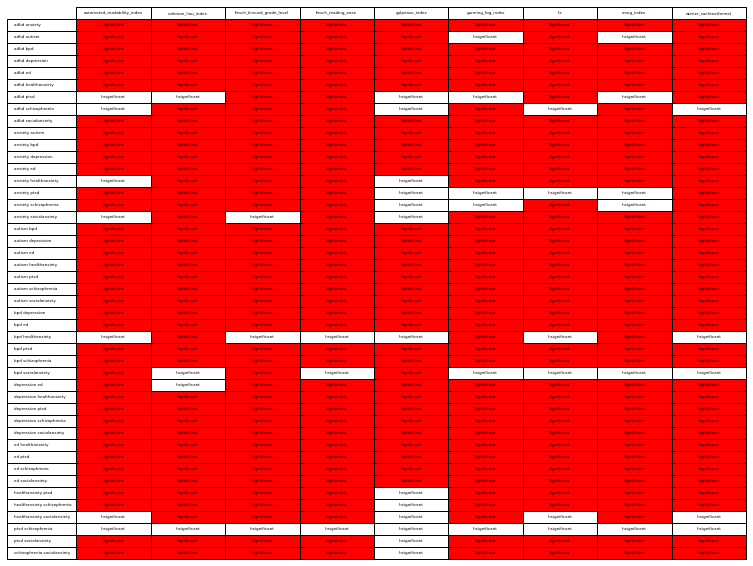

In [25]:
export_pdf_png(anova_df, "anova_results")

In [29]:
export_ipywidgets(anova_df)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

***T-Test***

The t-test assesses if there's a significant difference between two group means. It measures the size of the difference relative to the variability in the data.

* T-statistic: Shows the magnitude of the difference between group means. A higher value indicates a larger difference.

* P-value: Indicates the probability of observing such a difference if there's no real distinction between groups. A smaller p-value suggests a significant difference between groups.

* Interpretation: A small p-value (typically < 0.05) indicates a likely real difference between groups. A larger p-value suggests the observed difference might be due to chance.

In [30]:
t_test_significant_pairs = {} 
t_test_insignificant_pairs = {}

for parameter in readability_parameters:
    for pair in itertools.combinations(diseases, 2):
        disease_1 = pair[0]
        disease_2 = pair[1]

        group_1 = datasets[disease_1][parameter]
        group_2 = datasets[disease_2][parameter]

        t_stat, p_value = ttest_ind(group_1, group_2)
        if p_value < 0.05:
            if (disease_1, disease_2) not in t_test_significant_pairs:
                t_test_significant_pairs[(disease_1, disease_2)] = []
            t_test_significant_pairs[(disease_1, disease_2)].append(parameter)
        else:
            if (disease_1, disease_2) not in t_test_insignificant_pairs:
                t_test_insignificant_pairs[(disease_1, disease_2)] = []
            t_test_insignificant_pairs[(disease_1, disease_2)].append(parameter)
        print(f"T-test results for {parameter} between {disease_1} and {disease_2}: T-statistic = {t_stat}, p-value = {p_value}")

for pair, parameters in t_test_significant_pairs.items():
    if pair in t_test_insignificant_pairs:
        print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : {', '.join(t_test_insignificant_pairs[pair])}")
    else:
        print(f"{pair[0]} and {pair[1]}: {', '.join(parameters)} : No insignificant parameters")
for pair, parameters in t_test_insignificant_pairs.items():
    if pair not in t_test_significant_pairs:
        print(f"{pair[0]} and {pair[1]}: No significant parameters : {', '.join(parameters)}")


T-test results for automated_readability_index between adhd and anxiety: T-statistic = 11.626088211929789, p-value = 4.2508434680488645e-31
T-test results for automated_readability_index between adhd and autism: T-statistic = -6.948107420410898, p-value = 4.108654483850879e-12
T-test results for automated_readability_index between adhd and bpd: T-statistic = 10.735357058673586, p-value = 1.0889349728203145e-26
T-test results for automated_readability_index between adhd and depression: T-statistic = 29.19896262353126, p-value = 8.305541612711661e-185
T-test results for automated_readability_index between adhd and ed: T-statistic = 21.693009600053553, p-value = 2.4739430633892194e-101
T-test results for automated_readability_index between adhd and healthanxiety: T-statistic = 5.118798355898816, p-value = 3.1722471292037274e-07
T-test results for automated_readability_index between adhd and ptsd: T-statistic = 0.47752517183160764, p-value = 0.6330061576483705
T-test results for automated_

In [31]:
t_test_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=readability_parameters)

pretty_table(t_test_df)

+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|           Condition Pair           | automated_readability_index | coleman_liau_index | flesch_kincaid_grade_level | flesch_reading_ease | gulpease_index | gunning_fog_index |      lix      |   smog_index  | wiener_sachtextformel |
+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|        ('adhd', 'anxiety')         |         Significant         |    Significant     |        Significant         |     Significant     |  Significant   |    Significant    |  Significant  |  Significant  |      Significant      |
|         ('adhd', 'autism')         |         Significant      

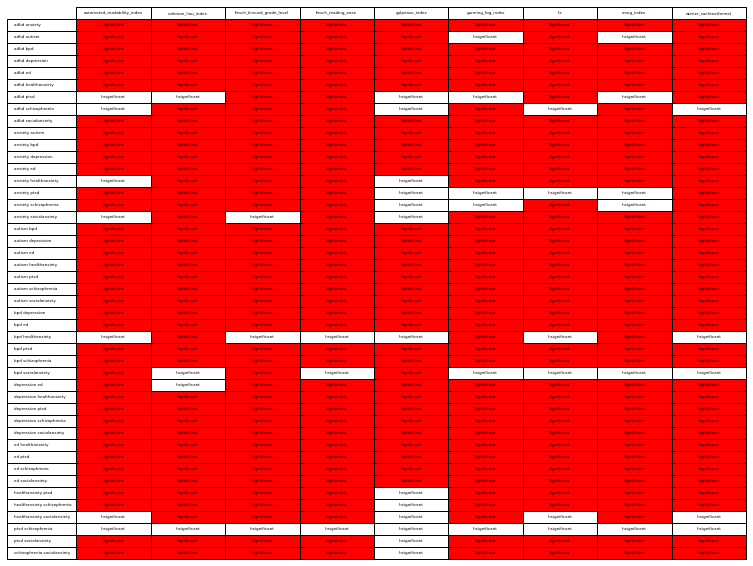

In [32]:
export_pdf_png(t_test_df, "t_test_results")

In [33]:
export_ipywidgets(t_test_df)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

***Tukey's HSD Test***

Tukey's HSD test is employed after an ANOVA to pinpoint specific group differences among three or more groups:

* Test Statistic: The test statistic quantifies the difference between group means in relation to within-group variability. Larger values denote more substantial differences.

* P-value: This value signifies the likelihood of observing extreme differences in sample means (or larger) if there were no actual differences between the population means. A smaller p-value (often < 0.05) suggests strong evidence against the null hypothesis.

Null hypotesis: There is no difference between the means of the groups.

In [34]:
tukeys_rejected_parameters = {pair: [] for pair in itertools.combinations(diseases, 2)}
tukeys_not_rejected_parameters = {pair: [] for pair in itertools.combinations(diseases, 2)}

for parameter in readability_parameters:
    data = []
    labels = []
    for disease in diseases:
        data.append(datasets[disease][parameter])
        labels.extend([disease] * len(datasets[disease][parameter]))

    tukey_results = pairwise_tukeyhsd(np.concatenate(data), labels)
    print(f"Tukey HSD test for {parameter}:")
    print(tukey_results)

    reject_mask = tukey_results.reject
    pairs = tukey_results._results_table.data[1:]

    for i, pair in enumerate(pairs):
        group_1, group_2 = pair[0], pair[1]
        if reject_mask[i]:
            tukeys_rejected_parameters[(group_1, group_2)].append(parameter)
        else:
            tukeys_not_rejected_parameters[(group_1, group_2)].append(parameter)

print("Summary of rejected and not rejected parameters:")
for pair in itertools.combinations(diseases, 2):
    rejected = tukeys_rejected_parameters[pair]
    not_rejected = tukeys_not_rejected_parameters[pair]
    print(f"{pair[0]} and {pair[1]}: Significant parameters - {rejected if rejected else 'None'}, Insignificant parameters - {not_rejected if not_rejected else 'None'}")


Tukey HSD test for automated_readability_index:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         adhd       anxiety  -0.5517    0.0 -0.7142 -0.3893   True
         adhd        autism    0.845    0.0  0.4705  1.2195   True
         adhd           bpd  -0.7676    0.0 -0.9976 -0.5377   True
         adhd    depression  -1.3182    0.0 -1.4596 -1.1768   True
         adhd            ed  -1.5948    0.0 -1.8165  -1.373   True
         adhd healthanxiety  -0.5685    0.0  -0.919 -0.2181   True
         adhd          ptsd  -0.0574    1.0  -0.427  0.3122  False
         adhd schizophrenia   0.1602 0.8457 -0.1554  0.4757  False
         adhd socialanxiety  -0.5675    0.0  -0.783 -0.3519   True
      anxiety        autism   1.3967    0.0  1.0313  1.7622   True
      anxiety           bpd  -0.2159 0.0478 -0.4308  -0.001   True
      anxiety 

In [35]:
tukeys_df = pd.DataFrame(index=pd.MultiIndex.from_tuples(itertools.combinations(datasets.keys(), 2)), columns=readability_parameters)

pretty_table(tukeys_df)

+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|           Condition Pair           | automated_readability_index | coleman_liau_index | flesch_kincaid_grade_level | flesch_reading_ease | gulpease_index | gunning_fog_index |      lix      |   smog_index  | wiener_sachtextformel |
+------------------------------------+-----------------------------+--------------------+----------------------------+---------------------+----------------+-------------------+---------------+---------------+-----------------------+
|        ('adhd', 'anxiety')         |         Significant         |    Significant     |        Significant         |     Significant     |  Significant   |    Significant    |  Significant  |  Significant  |      Significant      |
|         ('adhd', 'autism')         |         Significant      

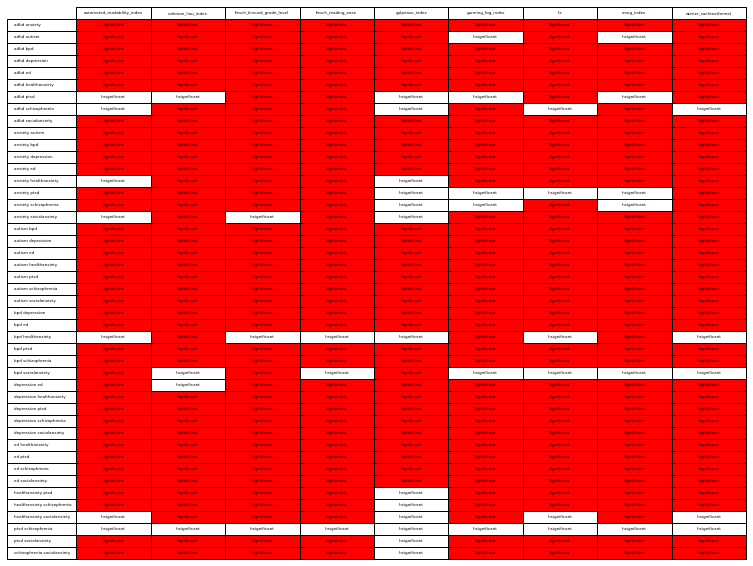

In [36]:
export_pdf_png(tukeys_df, "tukeys_results")

In [37]:
export_ipywidgets(tukeys_df)

GridBox(children=(Button(layout=Layout(width='100px'), style=ButtonStyle(button_color='white')), Button(layout…

***Effect Size Calculation***

Effect size measures quantify the strength of relationships, differences between means, or explained variance, aiding in the interpretation of study findings.

* Cohen's d: For comparing means between two groups, Cohen's d quantifies the difference in standard deviation units. Larger values indicate more substantial differences. A common benchmark is: small (around 0.2), medium (around 0.5), large (around 0.8).

* Interpretation Nuances: The significance of effect sizes varies across fields and contexts. Consider practical implications, previous research benchmarks, and the specific context of the study for accurate interpretation.

Null Hypothesis: There is no practical or significant difference or relationship between the compared groups or variables.

In [41]:
def cohen_d(group1, group2):
    diff = mean(group1) - mean(group2)
    pooled_std = ((len(group1) - 1) * std(group1) ** 2 + (len(group2) - 1) * std(group2) ** 2) / (len(group1) + len(group2) - 2)
    pooled_std = pooled_std ** 0.5
    return diff / pooled_std

effect_sizes = {}
cohens_d_significant_parameters = {pair: [] for pair in itertools.combinations(diseases, 2)}
cohens_d_insignificant_parameters = {pair: [] for pair in itertools.combinations(diseases, 2)}

# Threshold for Cohen's d
cohens_d_threshold = 0.2 

for parameter in readability_parameters:
    for pair in itertools.combinations(diseases, 2):
        dataset_1 = datasets[pair[0]][parameter]
        dataset_2 = datasets[pair[1]][parameter]

        effect_size = cohen_d(dataset_1, dataset_2)
        if parameter not in effect_sizes:
            effect_sizes[parameter] = {}
        effect_sizes[parameter][pair] = effect_size

        if abs(effect_size) >= cohens_d_threshold:
            cohens_d_significant_parameters[pair].append(parameter)
        else:
            cohens_d_insignificant_parameters[pair].append(parameter)

print("\nEffect sizes for all combinations of datasets and parameters:")
for parameter, pairs in effect_sizes.items():
    print(f"Effect sizes for {parameter}:")
    for pair, effect_size in pairs.items():
        print(f"{pair}: Cohen's d = {effect_size}")
    print()

print("Summary of significant and insignificant parameters for Cohen's d test:")
for pair in itertools.combinations(diseases, 2):
    significant = cohens_d_significant_parameters[pair]
    insignificant = cohens_d_insignificant_parameters[pair]
    print(f"{pair[0]} and {pair[1]}: Significant parameters - {significant if significant else 'None'}, Insignificant parameters - {insignificant if insignificant else 'None'}")



Effect sizes for all combinations of datasets and parameters:
Effect sizes for automated_readability_index:
('adhd', 'anxiety'): Cohen's d = 0.20542691322575413
('adhd', 'autism'): Cohen's d = -0.28313073414414625
('adhd', 'bpd'): Cohen's d = 0.2685520173547663
('adhd', 'depression'): Cohen's d = 0.44900807783643026
('adhd', 'ed'): Cohen's d = 0.5234501006471771
('adhd', 'healthanxiety'): Cohen's d = 0.19519113705540642
('adhd', 'ptsd'): Cohen's d = 0.019201112703271073
('adhd', 'schizophrenia'): Cohen's d = -0.05413634384586858
('adhd', 'socialanxiety'): Cohen's d = 0.20044981035470866
('anxiety', 'autism'): Cohen's d = -0.5282286209734334
('anxiety', 'bpd'): Cohen's d = 0.08292862380496019
('anxiety', 'depression'): Cohen's d = 0.2690870700880647
('anxiety', 'ed'): Cohen's d = 0.3789275255000619
('anxiety', 'healthanxiety'): Cohen's d = 0.006467107651982365
('anxiety', 'ptsd'): Cohen's d = -0.18666370456672848
('anxiety', 'schizophrenia'): Cohen's d = -0.2698479290220461
('anxiety',